# Chap9  Input/Output Operations

### ■ Pythonを使ってどうやってファイルにデータを読み書きするか

### ■ Serialization について
- Pythonオブジェクト階層をバイトストリーム（直列化させた文字列）に変換する処理のこと
<br><br>
- 処理の結果はどのオブジェクト（＝特定の関数の集まり）階層の処理かを知るため、その状態や種類を変数や識別子としてdiskに記録する必要がある。
<br><br>
- 理由はあとで使う、記録、他者との共有に備えて、汎用的にRAM（半導体メモリー）に呼び起こしやすくしておくため。
<br><br>
- 具体例として、別で学習済みモデルを使いたい時

# ① Basic with Python
- PythonはSQLとテキストに強い
- Numpyは高速バイナリ格納とオブジェクト検索の専用関数を提供

In [1]:
#　前準備
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
import pickle
import numpy as np
from random import gauss

### ■ Pickleを使ってガウス生成リストをファイルに読み書きしてみる

In [3]:
a = [gauss(1.5, 2) for i in range(1000000)]

In [4]:
#作成したい場所へのパス名を自分で設定する
#あとで同じディレクトリにあるデータを全て削除するコマンドがあるので、
#そのディレクトリは今は空という状態にしてください

path = '/Users/tamukikotaro/semi/'

In [5]:
#wb = Writing Bainary(?)
pkl_file = open(path + 'data.pkl', 'wb')

■ pickle.dump() でデータの書き込み

In [6]:
%time pickle.dump(a, pkl_file)

CPU times: user 35 ms, sys: 15.6 ms, total: 50.5 ms
Wall time: 49.6 ms


In [7]:
pkl_file.close()

In [8]:
ll $path*

-rw-r--r--  1 tamukikotaro  staff  9002006 Jun 20 11:09 /Users/tamukikotaro/semi/data.pkl


In [9]:
#wb = Reading Bainary(?)
pkl_file = open(path + 'data.pkl', 'rb')

■  pickle.load() でデータの読み込み

In [10]:
%time b = pickle.load(pkl_file)

CPU times: user 55.9 ms, sys: 27 ms, total: 82.9 ms
Wall time: 80.9 ms


In [11]:
a[:3]

[-1.1730603863329243, 1.3854377385254066, 0.9025385555207343]

In [12]:
b[:3]

[-1.1730603863329243, 1.3854377385254066, 0.9025385555207343]

In [13]:
# 書き込んだデータ = 読み込んだデータ
np.allclose(np.array(a), np.array(b))

True

■ ２つのオブジェクト（array）ならどうなるか

In [14]:
pkl_file = open(path + 'data.pkl', 'wb')

In [15]:
%time pickle.dump(np.array(a), pkl_file)

CPU times: user 46.4 ms, sys: 9.54 ms, total: 56 ms
Wall time: 60.8 ms


In [16]:
# aを二乗したデータを作成
%time pickle.dump(np.array(a)**2, pkl_file)

CPU times: user 45.2 ms, sys: 7.89 ms, total: 53.1 ms
Wall time: 51.6 ms


In [17]:
pkl_file.close()

In [18]:
ll $path*

-rw-r--r--  1 tamukikotaro  staff  16000322 Jun 20 11:09 /Users/tamukikotaro/semi/data.pkl


In [19]:
pkl_file = open(path + 'data.pkl', 'rb')

In [20]:
x = pickle.load(pkl_file)
x[:4]

array([-1.17306039,  1.38543774,  0.90253856,  6.15669254])

In [21]:
y = pickle.load(pkl_file)
y[:4]

array([ 1.37607067,  1.91943773,  0.81457584, 37.90486299])

In [22]:
pkl_file.close()

■ 先入れ先出し法（FIFO）の先に何が入っているかわからない性質を辞書格納で回避

In [23]:
pkl_file = open (path + 'data.pkl', 'wb')
pickle.dump({'x' : x, 'y' : y}, pkl_file)
pkl_file.close()

In [24]:
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [-1.17306039  1.38543774  0.90253856  6.15669254]
y [ 1.37607067  1.91943773  0.81457584 37.90486299]


In [25]:
#path配下のファイルがすべて削除されるので、単一のファイル以外のフォルダをpathにしている人は変更
#!rm -f $path*

### ■CSVの読み書き

In [26]:
import pandas as pd

In [27]:
#行＝5000、列＝5
rows = 5000
a = np.random.standard_normal((rows, 5)).round(4)

In [28]:
a

array([[-0.6135,  1.046 ,  1.8403, -0.4059,  1.2487],
       [ 0.871 , -0.2195, -0.7119,  1.3839,  1.1267],
       [-0.2026,  0.2008,  0.6122, -0.3759, -0.5428],
       ...,
       [ 0.6572,  2.1257, -0.0747, -0.646 ,  2.145 ],
       [-0.6885, -0.5391, -2.0692,  0.6463, -0.9737],
       [-1.0264,  0.6176,  1.2656, -1.0506, -0.0418]])

In [29]:
t = pd.date_range(start='2019/1/1', periods=rows, freq='H') 
#時系列データの頻度（https://note.nkmk.me/python-pandas-time-series-freq/）

In [30]:
t

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-07-27 22:00:00', '2019-07-27 23:00:00',
               '2019-07-28 00:00:00', '2019-07-28 01:00:00',
               '2019-07-28 02:00:00', '2019-07-28 03:00:00',
               '2019-07-28 04:00:00', '2019-07-28 05:00:00',
               '2019-07-28 06:00:00', '2019-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [31]:
csv_file = open(path + 'data.csv', 'w')

In [32]:
header = 'date,no1,no2,no3,no4,no5\n' 

In [33]:
csv_file.write(header)

25

In [34]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):  
    s = '{},{},{},{},{},{}\n'.format(t_, no1, no2, no3, no4, no5)  
    csv_file.write(s)  

In [35]:
csv_file.close()

In [36]:
ll $path*

-rw-r--r--  1 tamukikotaro  staff    284734 Jun 20 11:09 /Users/tamukikotaro/semi/data.csv
-rw-r--r--  1 tamukikotaro  staff  16000267 Jun 20 11:09 /Users/tamukikotaro/semi/data.pkl


■ readline()

In [37]:
csv_file = open(path +'data.csv', 'r')

In [38]:
for i in range(5):
    print(csv_file.readline(), end='')  

date,no1,no2,no3,no4,no5
2019-01-01 00:00:00,-0.6135,1.046,1.8403,-0.4059,1.2487
2019-01-01 01:00:00,0.871,-0.2195,-0.7119,1.3839,1.1267
2019-01-01 02:00:00,-0.2026,0.2008,0.6122,-0.3759,-0.5428
2019-01-01 03:00:00,-0.1957,-0.6414,-1.261,0.1778,-0.3923


In [39]:
csv_file.close()

■ readlines()

In [40]:
csv_file = open(path + 'data.csv', 'r')

In [41]:
content = csv_file.readlines()

In [42]:
content[:5]

['date,no1,no2,no3,no4,no5\n',
 '2019-01-01 00:00:00,-0.6135,1.046,1.8403,-0.4059,1.2487\n',
 '2019-01-01 01:00:00,0.871,-0.2195,-0.7119,1.3839,1.1267\n',
 '2019-01-01 02:00:00,-0.2026,0.2008,0.6122,-0.3759,-0.5428\n',
 '2019-01-01 03:00:00,-0.1957,-0.6414,-1.261,0.1778,-0.3923\n']

In [43]:
csv_file.close()

■ CSVは大切すぎて専用のモジュールができた

In [44]:
import csv

In [45]:
with open(path + 'data.csv', 'r' ) as  f:
    csv_reader = csv.reader(f)
    lines = [line for line in csv_reader]

In [46]:
lines[:5]

[['date', 'no1', 'no2', 'no3', 'no4', 'no5'],
 ['2019-01-01 00:00:00', '-0.6135', '1.046', '1.8403', '-0.4059', '1.2487'],
 ['2019-01-01 01:00:00', '0.871', '-0.2195', '-0.7119', '1.3839', '1.1267'],
 ['2019-01-01 02:00:00', '-0.2026', '0.2008', '0.6122', '-0.3759', '-0.5428'],
 ['2019-01-01 03:00:00', '-0.1957', '-0.6414', '-1.261', '0.1778', '-0.3923']]

In [47]:
with open(path + 'data.csv', 'r') as f:
    csv_reader = csv.DictReader(f)
    lines = [line for line in csv_reader]

In [48]:
lines[:3]

[OrderedDict([('date', '2019-01-01 00:00:00'),
              ('no1', '-0.6135'),
              ('no2', '1.046'),
              ('no3', '1.8403'),
              ('no4', '-0.4059'),
              ('no5', '1.2487')]),
 OrderedDict([('date', '2019-01-01 01:00:00'),
              ('no1', '0.871'),
              ('no2', '-0.2195'),
              ('no3', '-0.7119'),
              ('no4', '1.3839'),
              ('no5', '1.1267')]),
 OrderedDict([('date', '2019-01-01 02:00:00'),
              ('no1', '-0.2026'),
              ('no2', '0.2008'),
              ('no3', '0.6122'),
              ('no4', '-0.3759'),
              ('no5', '-0.5428')])]

In [49]:
#!rm -f $path*

### ■ SQLでの読み書き

■SQLについて (参考資料)
- https://www.techscore.com/blog/2016/03/04/%E9%96%8B%E7%99%BA%E6%96%B0%E5%8D%92%E3%81%AB%E6%8D%A7%E3%81%90%E3%80%81sql%E3%81%AE5%E3%81%A4%E3%81%AE%E5%9F%BA%E6%9C%AC/
- https://docs.oracle.com/cd/E16338_01/appdev.112/b61344/appe.htm#BABBFGAD

In [50]:
import sqlite3 as sq3

In [51]:
con = sq3.connect(path + 'numbs.db')

In [52]:
# table 作成
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'

In [53]:
#実行
con.execute(query)

In [54]:
#変更をコミット
con.commit()

In [55]:
#実行
q = con.execute

In [56]:
#データベースにテーブルを作成されているのを確認する
q('SELECT * FROM sqlite_master').fetchall()

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (Date date, No1 real, No2 real)')]

■ datetimeのデータをSQLファイルに読み書きしてみる

In [57]:
import datetime

In [58]:
now = datetime.datetime.now()
q('SELECT * FROM sqlite_master').fetchall() 

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (Date date, No1 real, No2 real)')]

In [59]:
np.random.seed(100)

In [60]:
data = np.random.standard_normal((10000, 2)).round(4)

In [61]:
%%time
    for row in data:  
        now = datetime.datetime.now()
        q('INSERT INTO numbs VALUES(?, ?, ?)', (now, row[0], row[1]))
        con.commit()

CPU times: user 1.2 s, sys: 7.76 s, total: 8.96 s
Wall time: 15.3 s


In [62]:
q('SELECT * FROM numbs').fetchmany(4)

[('2019-06-20 11:09:20.457860', -1.7498, 0.3427),
 ('2019-06-20 11:09:20.464484', 1.153, -0.2524),
 ('2019-06-20 11:09:20.466232', 0.9813, 0.5142),
 ('2019-06-20 11:09:20.467667', 0.2212, -1.07)]

In [63]:
q('SELECT * FROM numbs WHERE no1 > 0.5').fetchmany(4)

[('2019-06-20 11:09:20.464484', 1.153, -0.2524),
 ('2019-06-20 11:09:20.466232', 0.9813, 0.5142),
 ('2019-06-20 11:09:20.474349', 0.6727, -0.1044),
 ('2019-06-20 11:09:20.479185', 1.619, 1.5416)]

In [64]:
pointer = q('SELECT * FROM numbs')

In [65]:
for i in range(3):
    print(pointer.fetchone())

('2019-06-20 11:09:20.457860', -1.7498, 0.3427)
('2019-06-20 11:09:20.464484', 1.153, -0.2524)
('2019-06-20 11:09:20.466232', 0.9813, 0.5142)


In [66]:
rows = pointer.fetchall()  
rows[:3]

[('2019-06-20 11:09:20.467667', 0.2212, -1.07),
 ('2019-06-20 11:09:20.468657', -0.1895, 0.255),
 ('2019-06-20 11:09:20.469883', -0.458, 0.4352)]

In [67]:
#データの削除
q('DROP TABLE IF EXISTS numbs')

In [68]:
q('SELECT * FROM sqlite_master').fetchall()

[]

In [69]:
con.close()

In [70]:
#!rm -f $path*

### ■ numpy 使って上と同じ処理をしてみるとどうなるか

In [71]:
# datetimeのnp配列を作る、ゼロスで全体の枠作って、日付欄にそのnp配列を入れる感じ
dtimes = np.arange('2019-01-01 10:00:00', '2025-12-31 22:00:00',dtype='datetime64[m]')

In [72]:
len(dtimes)

3681360

In [73]:
dty = np.dtype([('Date', 'datetime64[m]'),('No1', 'f'), ('No2', 'f')])

In [74]:
data = np.zeros(len(dtimes), dtype=dty)  

In [75]:
data['Date'] = dtimes  

In [76]:
a = np.random.standard_normal((len(dtimes), 2)).round(4)

In [77]:
data['No1'] = a[:, 0]  
data['No2'] = a[:, 1]

In [78]:
data.nbytes

58901760

In [79]:
%time np.save(path + 'array', data)

CPU times: user 12.6 ms, sys: 247 ms, total: 259 ms
Wall time: 290 ms


■ サイズ大きいのに処理が早い、2倍のサイズでもやってみるけど早い

In [80]:
ll $path*

-rw-r--r--  1 tamukikotaro  staff  58901888 Jun 20 11:09 /Users/tamukikotaro/semi/array.npy
-rw-r--r--  1 tamukikotaro  staff    284734 Jun 20 11:09 /Users/tamukikotaro/semi/data.csv
-rw-r--r--  1 tamukikotaro  staff  16000267 Jun 20 11:09 /Users/tamukikotaro/semi/data.pkl
-rw-r--r--  1 tamukikotaro  staff    520192 Jun 20 11:09 /Users/tamukikotaro/semi/numbs.db


In [81]:
%time np.load(path + 'array.npy')

CPU times: user 1.75 ms, sys: 46.5 ms, total: 48.3 ms
Wall time: 46.3 ms


array([('2019-01-01T10:00',  1.5131,  0.6973),
       ('2019-01-01T10:01', -1.722 , -0.4815),
       ('2019-01-01T10:02',  0.8251,  0.3019), ...,
       ('2025-12-31T21:57',  1.372 ,  0.6446),
       ('2025-12-31T21:58', -1.2542,  0.1612),
       ('2025-12-31T21:59', -1.1997, -1.097 )],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [82]:
%time data = np.random.standard_normal((10000, 6000)).round(4)

CPU times: user 3.14 s, sys: 983 ms, total: 4.12 s
Wall time: 5.18 s


In [83]:
data.nbytes

480000000

In [84]:
%time np.save(path + 'array', data)

CPU times: user 80.5 ms, sys: 821 ms, total: 902 ms
Wall time: 1.11 s


In [85]:
ll $path*

-rw-r--r--  1 tamukikotaro  staff  480000128 Jun 20 11:09 /Users/tamukikotaro/semi/array.npy
-rw-r--r--  1 tamukikotaro  staff     284734 Jun 20 11:09 /Users/tamukikotaro/semi/data.csv
-rw-r--r--  1 tamukikotaro  staff   16000267 Jun 20 11:09 /Users/tamukikotaro/semi/data.pkl
-rw-r--r--  1 tamukikotaro  staff     520192 Jun 20 11:09 /Users/tamukikotaro/semi/numbs.db


In [86]:
%time np.load(path + 'array.npy')

CPU times: user 1.91 ms, sys: 340 ms, total: 342 ms
Wall time: 337 ms


array([[ 0.3066,  0.5951,  0.5826, ...,  1.6773,  0.4294, -0.2216],
       [ 0.8769,  0.7292, -0.9557, ...,  0.5084,  0.9635, -0.4443],
       [-1.2202, -2.5509, -0.0575, ..., -1.6128,  0.4662, -1.3645],
       ...,
       [-0.5598,  0.2393, -2.3716, ...,  1.7669,  0.2462,  1.035 ],
       [ 0.273 ,  0.8216, -0.0749, ..., -0.0552, -0.8396,  0.3077],
       [-0.6305,  0.8331,  1.3702, ...,  0.3493,  0.1981,  0.2037]])

In [87]:
#!rm -f $path*

### ■ ①のまとめ
- Pickleはすべてのオブジェクトを一度に扱えるので利便性は高い
- しかしバージョンの違いやプラットフォームを超えたシェアでバグが起きるかも
- 処理もより早いNumpyやPandasがおすすめ
- Pythonはほとんどのデータベース技術とうまく作動してくれる
- Numpyは最適化されているので処理がとても早い

# ② with Pandas
- Pndasはデータの読み書きに関してのコマンドが豊富にある

### ■ Pandasを使ってSQLを読み書きしてみる

In [88]:
# まずはsqlファイルの作成
data = np.random.standard_normal((1000000, 5)).round(4)

data[:3]

array([[ 0.4918,  1.3707,  0.137 ,  0.3981, -1.0059],
       [ 0.4516,  1.4445,  0.0555, -0.0397,  0.44  ],
       [ 0.1629, -0.8473, -0.8223, -0.4621, -0.5137]])

In [89]:
filename = path + 'numbers'

con = sq3.Connection(filename + '.db')

query = 'CREATE TABLE numbers (No1 real, No2 real, No3 real, No4 real, No5 real)'  

q = con.execute
#executemany()メソッドは一次元配列のみで使用可能
qm = con.executemany

q(query)

In [90]:
%%time
qm('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)  
con.commit()

CPU times: user 7.91 s, sys: 220 ms, total: 8.13 s
Wall time: 8.54 s


In [91]:
ll $path*

-rw-r--r--  1 tamukikotaro  staff  480000128 Jun 20 11:09 /Users/tamukikotaro/semi/array.npy
-rw-r--r--  1 tamukikotaro  staff     284734 Jun 20 11:09 /Users/tamukikotaro/semi/data.csv
-rw-r--r--  1 tamukikotaro  staff   16000267 Jun 20 11:09 /Users/tamukikotaro/semi/data.pkl
-rw-r--r--  1 tamukikotaro  staff   52633600 Jun 20 11:09 /Users/tamukikotaro/semi/numbers.db
-rw-r--r--  1 tamukikotaro  staff     520192 Jun 20 11:09 /Users/tamukikotaro/semi/numbs.db


In [92]:
%%time
temp = q('SELECT * FROM numbers').fetchall()  
print(temp[:3])

[(0.4918, 1.3707, 0.137, 0.3981, -1.0059), (0.4516, 1.4445, 0.0555, -0.0397, 0.44), (0.1629, -0.8473, -0.8223, -0.4621, -0.5137)]
CPU times: user 1.97 s, sys: 190 ms, total: 2.16 s
Wall time: 2.53 s


In [93]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(q(query).fetchall()).round(3) 

CPU times: user 760 ms, sys: 94.1 ms, total: 854 ms
Wall time: 941 ms


In [94]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(q(query).fetchall()).round(3)

CPU times: user 645 ms, sys: 67.9 ms, total: 713 ms
Wall time: 745 ms


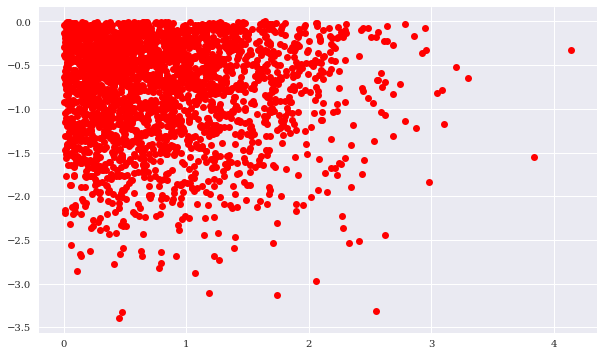

In [95]:
res = res[::100]  
plt.figure(figsize=(10, 6))
plt.plot(res[:, 0], res[:, 1], 'ro') 

In [96]:
#sql→pandasへの読み込み
%time data = pd.read_sql('SELECT * FROM numbers', con)

CPU times: user 2.09 s, sys: 235 ms, total: 2.32 s
Wall time: 2.38 s


In [97]:
data.head()

,No1,No2,No3,No4,No5
0,0.4918,1.3707,0.1370,0.3981,-1.0059
1,0.4516,1.4445,0.0555,-0.0397,0.4400
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
3,1.3064,0.9125,0.5142,-0.7868,-0.3398
4,-0.1148,-1.5215,-0.7045,-1.0042,-0.0600


In [98]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head() 

CPU times: user 20.8 ms, sys: 10.8 ms, total: 31.6 ms
Wall time: 29.2 ms


,No1,No2,No3,No4,No5
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
5,0.1893,-0.0207,-0.2104,0.9419,0.2551
8,1.4784,-0.3333,-0.7050,0.3586,-0.3937
10,0.8092,-0.9899,1.0364,-1.0453,0.0579
11,0.9065,-0.7757,-0.9267,0.7797,0.0863


In [99]:
%%time
q = '(No1 < -0.5 | No1 > 0.5) & (No2 < -1 | No2 > 1)'  
res = data[['No1', 'No2']].query(q)

CPU times: user 56.1 ms, sys: 20.8 ms, total: 76.9 ms
Wall time: 60.7 ms


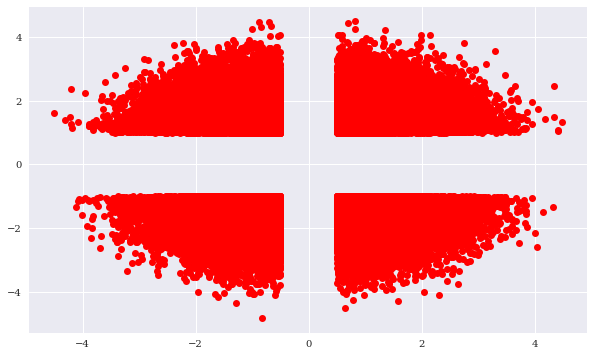

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(res['No1'], res['No2'], 'ro');

### ■ Pandasを使ってHDF5を読み書きしてみる

■ **HDF5とは**
- Hierarchical Data Format の5
- http://villageofsound.hatenadiary.jp/entry/2014/10/29/021605

In [101]:
#書き

In [102]:
h5s = pd.HDFStore(filename + '.h5s', 'w')  

In [103]:
%time h5s['data'] = data

CPU times: user 57.9 ms, sys: 68.2 ms, total: 126 ms
Wall time: 144 ms


In [104]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/tamukikotaro/semi/numbers.h5s
/data            frame        (shape->[1000000,5])

In [105]:
h5s.close()

In [106]:
#読み

In [107]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
data_ = h5s['data']
h5s.close()

CPU times: user 13.1 ms, sys: 22.8 ms, total: 35.9 ms
Wall time: 37.7 ms


In [108]:
#オブジェクトは同じではないが、中身は一緒
data_ is data

False

In [109]:
#オブジェクトは同じではないが、中身は一緒
(data_ == data).all()

No1    True
No2    True
No3    True
No4    True
No5    True
dtype: bool

In [110]:
np.allclose(data_, data)

True

In [112]:
#.db > .h5s

In [113]:
ll $path*

-rw-r--r--  1 tamukikotaro  staff  480000128 Jun 20 11:09 /Users/tamukikotaro/semi/array.npy
-rw-r--r--  1 tamukikotaro  staff     284734 Jun 20 11:09 /Users/tamukikotaro/semi/data.csv
-rw-r--r--  1 tamukikotaro  staff   16000267 Jun 20 11:09 /Users/tamukikotaro/semi/data.pkl
-rw-r--r--  1 tamukikotaro  staff   52633600 Jun 20 11:09 /Users/tamukikotaro/semi/numbers.db
-rw-r--r--  1 tamukikotaro  staff   48007192 Jun 20 11:10 /Users/tamukikotaro/semi/numbers.h5s
-rw-r--r--  1 tamukikotaro  staff     520192 Jun 20 11:09 /Users/tamukikotaro/semi/numbs.db


### ■ Pandasを使ってCSVを読み書きしてみる

In [114]:
%time data.to_csv(filename + '.csv')

CPU times: user 6.49 s, sys: 174 ms, total: 6.66 s
Wall time: 6.76 s


In [115]:
ll $path

total 1268592
-rw-r--r--  1 tamukikotaro  staff  480000128 Jun 20 11:09 array.npy
-rw-r--r--  1 tamukikotaro  staff     284734 Jun 20 11:09 data.csv
-rw-r--r--  1 tamukikotaro  staff   16000267 Jun 20 11:09 data.pkl
-rw-r--r--  1 tamukikotaro  staff   43834157 Jun 20 11:11 numbers.csv
-rw-r--r--  1 tamukikotaro  staff   52633600 Jun 20 11:09 numbers.db
-rw-r--r--  1 tamukikotaro  staff   48007192 Jun 20 11:10 numbers.h5s
-rw-r--r--  1 tamukikotaro  staff     520192 Jun 20 11:09 numbs.db


In [116]:
%time df = pd.read_csv(filename + '.csv')

CPU times: user 949 ms, sys: 105 ms, total: 1.05 s
Wall time: 1.09 s


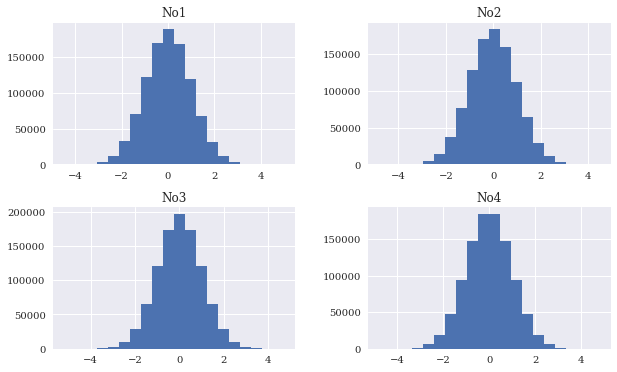

In [117]:
df[['No1', 'No2', 'No3', 'No4']].hist(bins=20, figsize=(10, 6));

### ■ Pandasを使ってExcelを読み書きしてみる

In [118]:
%time data[:100000].to_excel(filename + '.xlsx')

CPU times: user 11.1 s, sys: 236 ms, total: 11.4 s
Wall time: 11.5 s


In [119]:
%time df = pd.read_excel(filename + '.xlsx', 'Sheet1')

CPU times: user 6.02 s, sys: 86.3 ms, total: 6.11 s
Wall time: 6.44 s


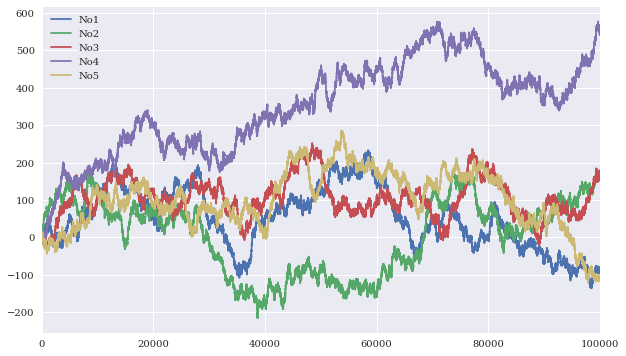

In [120]:
df.cumsum().plot(figsize=(10, 6));

In [121]:
ll $path*

-rw-r--r--  1 tamukikotaro  staff  480000128 Jun 20 11:09 /Users/tamukikotaro/semi/array.npy
-rw-r--r--  1 tamukikotaro  staff     284734 Jun 20 11:09 /Users/tamukikotaro/semi/data.csv
-rw-r--r--  1 tamukikotaro  staff   16000267 Jun 20 11:09 /Users/tamukikotaro/semi/data.pkl
-rw-r--r--  1 tamukikotaro  staff   43834157 Jun 20 11:11 /Users/tamukikotaro/semi/numbers.csv
-rw-r--r--  1 tamukikotaro  staff   52633600 Jun 20 11:09 /Users/tamukikotaro/semi/numbers.db
-rw-r--r--  1 tamukikotaro  staff   48007192 Jun 20 11:10 /Users/tamukikotaro/semi/numbers.h5s
-rw-r--r--  1 tamukikotaro  staff    4050867 Jun 20 11:11 /Users/tamukikotaro/semi/numbers.xlsx
-rw-r--r--  1 tamukikotaro  staff     520192 Jun 20 11:09 /Users/tamukikotaro/semi/numbs.db


In [122]:
#rm -f $path*

### ■ ②のまとめ
- Pandasの処理はNumpy同様に早い<br><br>
- SQLよりもHDF5は処理速度が早く代替可能性がある<br><br>
- CSVやEXCELは読み書きが遅い<br><br>
- しかしCSVは唯一テキストデータを扱うものである<br><br>